# Exploratory Data Analysis Of Sales Dataset

**Objective : This EDA aims to understand the variation in sales over time, identify states with higher frequency of orders, and determine the revenue generated by different products categories.**

Importing the required libraries

In [3]:
#jgj
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

C:\Users\Vikas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Importing Our Dataset

In [4]:
# Importing the dataset and Keeping only the required columns
data=pd.read_csv("amazon sales 2.csv",usecols=["Order ID","Date","Status","Sales Channel","ship-service-level","Category","Size","Amount","ship-city","ship-state","fulfilled-by","Courier Status","ship-country"])

In [5]:
#checking datatype & some additional information of each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Sales Channel       128975 non-null  object 
 4   ship-service-level  128975 non-null  object 
 5   Category            128975 non-null  object 
 6   Size                128975 non-null  object 
 7   Courier Status      128975 non-null  object 
 8   Amount              128975 non-null  float64
 9   ship-city           128975 non-null  object 
 10  ship-state          128975 non-null  object 
 11  ship-country        128975 non-null  object 
 12  fulfilled-by        128975 non-null  object 
dtypes: float64(1), object(12)
memory usage: 12.8+ MB


In [6]:
#checking data 
data

,Order ID,Date,Status,Sales Channel,ship-service-level,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country,fulfilled-by
0,405-8078784-5731545,4/30/2022,Cancelled,Amazon.in,Standard,Set,S,Shipped,647.62,MUMBAI,MAHARASHTRA,IN,Easy Ship
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Amazon.in,Standard,kurta,3XL,Shipped,406.00,BENGALURU,KARNATAKA,IN,Easy Ship
2,404-0687676-7273146,4/30/2022,Shipped,Amazon.in,Expedited,kurta,XL,Shipped,329.00,NAVI MUMBAI,MAHARASHTRA,IN,BlueDart
3,403-9615377-8133951,4/30/2022,Cancelled,Amazon.in,Standard,Western Dress,L,Shipped,753.33,PUDUCHERRY,PUDUCHERRY,IN,Easy Ship
4,407-1069790-7240320,4/30/2022,Shipped,Amazon.in,Expedited,Top,3XL,Shipped,574.00,CHENNAI,TAMIL NADU,IN,BlueDart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon.in,Expedited,kurta,XL,Shipped,517.00,HYDERABAD,TELANGANA,IN,Easy Ship
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon.in,Expedited,Set,M,Shipped,999.00,GURUGRAM,HARYANA,IN,Easy Ship
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon.in,Expedited,Western Dress,XXL,Shipped,690.00,HYDERABAD,TELANGANA,IN,BlueDart
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon.in,Expedited,Set,XS,Shipped,1199.00,Halol,Gujarat,IN,Amazon


In [7]:
# Checking top 5 records
data.head()

,Order ID,Date,Status,Sales Channel,ship-service-level,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country,fulfilled-by
0,405-8078784-5731545,4/30/2022,Cancelled,Amazon.in,Standard,Set,S,Shipped,647.62,MUMBAI,MAHARASHTRA,IN,Easy Ship
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Amazon.in,Standard,kurta,3XL,Shipped,406.00,BENGALURU,KARNATAKA,IN,Easy Ship
2,404-0687676-7273146,4/30/2022,Shipped,Amazon.in,Expedited,kurta,XL,Shipped,329.00,NAVI MUMBAI,MAHARASHTRA,IN,BlueDart
3,403-9615377-8133951,4/30/2022,Cancelled,Amazon.in,Standard,Western Dress,L,Shipped,753.33,PUDUCHERRY,PUDUCHERRY,IN,Easy Ship
4,407-1069790-7240320,4/30/2022,Shipped,Amazon.in,Expedited,Top,3XL,Shipped,574.00,CHENNAI,TAMIL NADU,IN,BlueDart


In [8]:
# Checking last 5 records
data.tail()

,Order ID,Date,Status,Sales Channel,ship-service-level,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country,fulfilled-by
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon.in,Expedited,kurta,XL,Shipped,517.0,HYDERABAD,TELANGANA,IN,Easy Ship
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon.in,Expedited,Set,M,Shipped,999.0,GURUGRAM,HARYANA,IN,Easy Ship
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon.in,Expedited,Western Dress,XXL,Shipped,690.0,HYDERABAD,TELANGANA,IN,BlueDart
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon.in,Expedited,Set,XS,Shipped,1199.0,Halol,Gujarat,IN,Amazon
128974,408-7436540-8728312,5/31/2022,Shipped,Amazon.in,Expedited,Set,S,Shipped,696.0,Raipur,CHHATTISGARH,IN,Amazon


In [9]:
# Name of all columns
data.columns

Index(['Order ID', 'Date', 'Status', 'Sales Channel', 'ship-service-level',
       'Category', 'Size', 'Courier Status', 'Amount', 'ship-city',
       'ship-state', 'ship-country', 'fulfilled-by'],
      dtype='object')

In [10]:
# Checking the number of rows and columns our data contains
data.shape

(128975, 13)

In [11]:
# Checking Total No. of columns
len(data.columns)

13

Checking the no. of null values each column contains 

In [12]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Amount                0
ship-city             0
ship-state            0
ship-country          0
fulfilled-by          0
dtype: int64

In [13]:
# Checking the datatypes of our dataset columns
data.dtypes

Order ID               object
Date                   object
Status                 object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Amount                float64
ship-city              object
ship-state             object
ship-country           object
fulfilled-by           object
dtype: object

# 

# Question 1:-  What percentage(%) of orders have been shipped versus those that have been cancelled?

In [14]:
data["Status"].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

Plotting Barplot for Above 

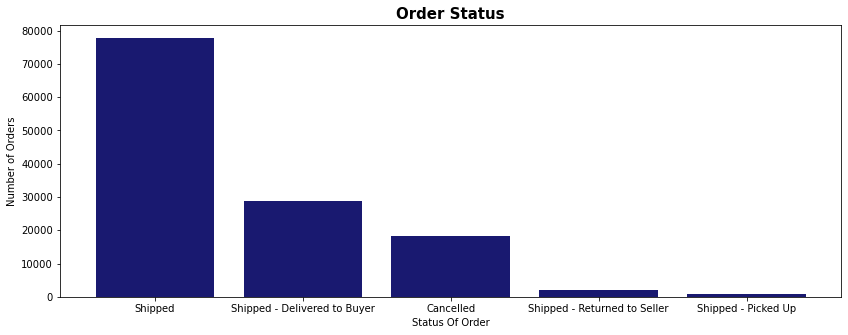

In [15]:
plt.figure(figsize=(14,5))
plt.bar(list(data["Status"].value_counts()[0:5].keys()),list(data["Status"].value_counts()[0:5]),color="midnightblue")
plt.xlabel("Status Of Order",fontsize=10)
plt.ylabel("Number of Orders")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Order Status",fontsize=15,fontweight="bold")
plt.show()

In [78]:
data["Status"].value_counts()["Shipped"]

77804

In [81]:
data["Status"].value_counts()["Cancelled"]

18332

In [80]:
len(data["Status"])

128975

In [87]:
# Percentage of "shipped orders" w.r.t totalorders
(77804/128975)*100

60.324869160690056

In [86]:
# Percentage of "cancelled orders" w.r.t totalorders
(18332/128975)*100

14.213607288234154

**Conclusion of Question1**:- 

Based on the data we have, nearly **60%** of the total orders were Shipped, while **14%** of the total orders were Cancelled.

# 

# Question 2:-What are the top 5 states in India & top 5 categories in terms of placing orders?

In [17]:
data["ship-state"].value_counts().head(5)

MAHARASHTRA      22260
KARNATAKA        17326
TAMIL NADU       11483
TELANGANA        11330
UTTAR PRADESH    10638
Name: ship-state, dtype: int64

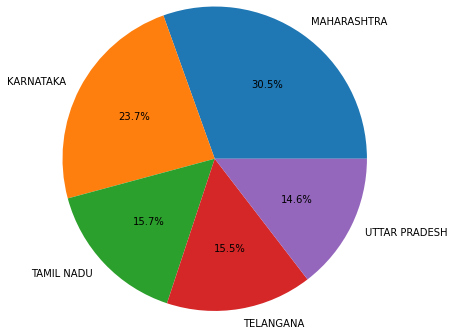

In [18]:
# Pie plot to show the above data
plt.pie(list(data["ship-state"].value_counts()[0:5]),labels=list(data["ship-state"].value_counts()[0:5].keys()),autopct="%0.1f%%",radius=1.75)
plt.show()

Top 5 Category Of Products

In [19]:
data["Category"].value_counts().head()

Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Name: Category, dtype: int64

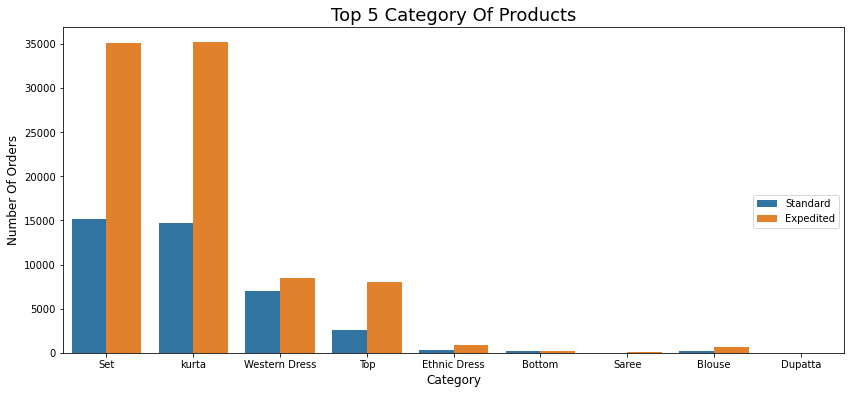

In [93]:
# Barplot of "Top 5 Category Of Products" incontext of "ship-service-level"
plt.figure(figsize=(14,6))
sns.countplot(x="Category",data=data,hue="ship-service-level")
plt.xlabel("Category",fontsize=12)
plt.ylabel("Number Of Orders",fontsize=12)
plt.title("Top 5 Category Of Products",fontsize=18)
plt.legend(loc=1,bbox_to_anchor=(1.0,0.5))
plt.show()

**Conclusion of Question2:-** 

Based on the EDA, the **Top 5 States in India** in terms of placing orders are Maharashtra, Uttar Pradesh, Karnataka, Telangana and Tamil Nadu with 30%, 14.6%, 23.7%,15.5% and 15.7%  of the total orders placed, respectively.

And the **Top 5 Categories** from which customers place their orders in the clothing category are Kurta, Western dress, Top, Ethnic dress, and Dupatta .

# 

# Question 3:- On which date were the maximum orders placed? 

In [94]:
# Checking on which top5 date maximum orders were placed 
data["Date"].value_counts().head(1)

2022-05-03    2085
Name: Date, dtype: int64

**Conclusion of Question3:-** 

Based on the EDA, On **2022-05-03** ,maximum orders were placed as per our data i.e., 2085 Orders.

# 

# Question 4:- How many products were ordered in each month and the % of products ordered each month?

**Since there is no month column available, we will first create a month column from the available data.**

Checking datatype of "DATE" column

In [22]:
#Checking the datatype of "Date" Column
type(data["Date"].iloc[0])

str

Changing datatype of "DATE" column 

In [23]:
data["Date"]=pd.to_datetime(data["Date"])

Creating Month Column

In [24]:
data["Month"]=data["Date"].apply(lambda t:t.month)

In [25]:
data["Month"]

0         4
1         4
2         4
3         4
4         4
         ..
128970    5
128971    5
128972    5
128973    5
128974    5
Name: Month, Length: 128975, dtype: int64

In [26]:
# Replacing the Month Numbers with the Month Names
data["Month"]=data["Month"].map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [27]:
data["Month"]

0         April
1         April
2         April
3         April
4         April
          ...  
128970      May
128971      May
128972      May
128973      May
128974      May
Name: Month, Length: 128975, dtype: object

In [28]:
# For checking which year's data we have
data["Date"].apply(lambda t:t.year).unique() # that means only 2022 data is present

array([2022], dtype=int64)

In [96]:
# Checking the distinct month in "Month" column
data["Month"].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

**No. Of Products Ordered In Each Month**

In [30]:
data["Month"].value_counts()

April    49067
May      42040
June     37697
March      171
Name: Month, dtype: int64

**Conclusion of Question 4:-** 

Based on the EDA, **the Number of Products ordered in each month** during the entire data we have are as follows:
April- 49067,
 May- 42040,
 June- 37697,
 March- 171 
 
and the **Percentage of Orders placed in each month** are as follows: April (37.98%), May (32.61%), June (29.23%), and March (0.13%).

# 

# Question 5:- What is the percentage of orders which preferred "Expited Shipping" shipping service?

No. Of People Opted For "Expedited Shipping"

In [31]:
len(data[data["ship-service-level"]=="Expedited"])

88615

In [32]:
data.shape

(128975, 14)

In [97]:
(88615/128975)*100

68.70711378174065

**Conclusion of Question 5:-**  
According to the EDA, **almost 68%** of the orders were placed using the **"Expedited Shipping" service**, while the **remaining 32%** of the orders were placed using the **"Standard Shipping" service**.

# 

Checking The "ship-country" Column 

In [34]:
data["ship-country"].unique()

array(['IN'], dtype=object)

# 

"Status of courier" of orders

In [35]:
# Checking the status of customer's couriers
data["Courier Status"].value_counts()

Shipped      114284
Unshipped      7558
Cancelled      7133
Name: Courier Status, dtype: int64

# 

# Creating a DataFrame that contains information about "Cancelled Orders" only

In [36]:
cancelled_orders=data[data["Courier Status"]=="Cancelled"]

In [37]:
cancelled_orders

,Order ID,Date,Status,Sales Channel,ship-service-level,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country,fulfilled-by,Month
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon.in,Expedited,Set,3XL,Cancelled,126.16,HYDERABAD,TELANGANA,IN,Amazon,April
65,171-4137548-0481151,2022-04-30,Cancelled,Amazon.in,Expedited,kurta,XXL,Cancelled,482.15,Dahod,Gujarat,IN,Easy Ship,April
84,403-9950518-0349133,2022-04-30,Cancelled,Amazon.in,Expedited,kurta,M,Cancelled,326.15,HYDERABAD,TELANGANA,IN,Amazon,April
95,405-9112089-3379536,2022-04-30,Cancelled,Amazon.in,Expedited,kurta,L,Cancelled,299.00,PUNE,MAHARASHTRA,IN,Easy Ship,April
101,402-7841951-1872363,2022-04-30,Cancelled,Amazon.in,Expedited,Set,S,Cancelled,199.00,NEW DELHI,DELHI,IN,Easy Ship,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon.in,Expedited,kurta,M,Cancelled,699.00,ANANTAPUR,ANDHRA PRADESH,IN,Easy Ship,May
128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon.in,Expedited,Set,3XL,Cancelled,699.00,GREATER NOIDA,UTTAR PRADESH,IN,Easy Ship,May
128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon.in,Expedited,Set,3XL,Cancelled,699.00,GREATER NOIDA,UTTAR PRADESH,IN,BlueDart,May
128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon.in,Expedited,Set,L,Cancelled,699.00,Bengaluru,KARNATAKA,IN,Amazon,May


# 

# Question 6:- What are the Top 5 States in India in terms of cancelling orders?

In [38]:
cancel_top5=cancelled_orders["ship-state"].value_counts().head()

In [101]:
cancelled_orders["ship-state"].value_counts().sum()

7133

In [39]:
cancel_top5

MAHARASHTRA      1128
KARNATAKA         845
TELANGANA         640
TAMIL NADU        637
UTTAR PRADESH     615
Name: ship-state, dtype: int64

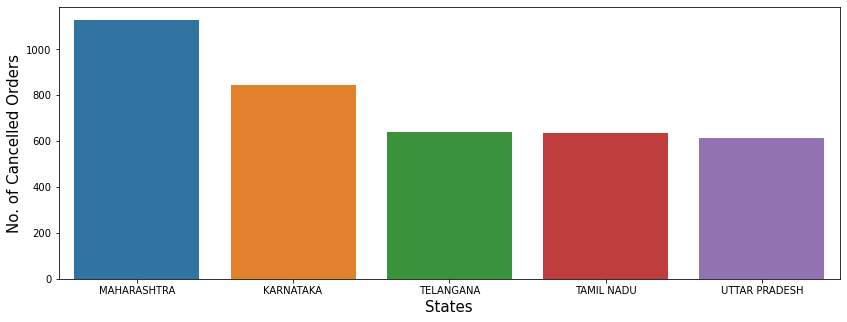

In [40]:
# Barplot for showing the "Top 5 states in terms of cancelling orders"
plt.figure(figsize=(14,5))
sns.barplot(x=cancel_top5.index,y=cancel_top5)
plt.xlabel("States",fontsize=15)
plt.ylabel("No. of Cancelled Orders",fontsize=15)
plt.show()

**Conclusion of Question 6:-** 

Based on the EDA, the **Top 5 States in India in terms of Cancelling Orders** are Maharashtra, Karnataka, Telangana, Tamil Nadu, and Uttar Pradesh, with **15.81%**, **11.85%**, **8.98%**, **8.93%**, and **8.62%** of the total cancelled orders, respectively ¹.

# 

# Question 7:- What were the dates between Feb 2021 and July 2021 when the highest number of orders were cancelled?


In [41]:
cancel_date=cancelled_orders["Date"].value_counts()

In [42]:
cancel_date

2022-05-03    158
2022-04-15    143
2022-05-04    142
2022-05-02    135
2022-04-30    114
             ... 
2022-05-14     51
2022-05-21     47
2022-06-26     45
2022-06-29     23
2022-03-31     10
Name: Date, Length: 91, dtype: int64

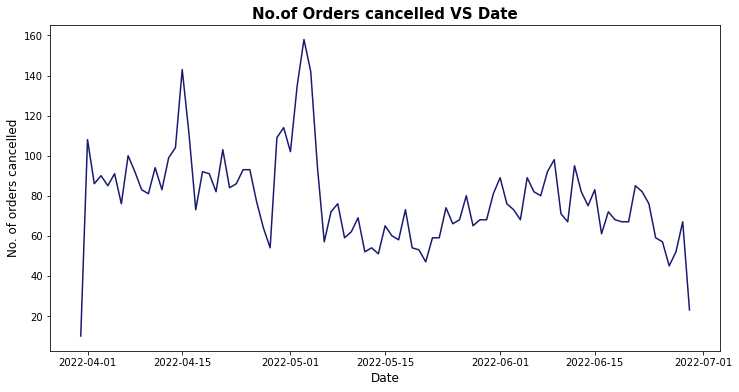

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x=cancel_date.index,y=cancel_date,color="midnightblue")
plt.xlabel("Date",fontsize=12)
plt.ylabel("No. of orders cancelled",fontsize=12)
plt.title("No.of Orders cancelled VS Date",fontsize=15,fontweight="bold")
plt.show()  # "Most orders were cancelled on 15 April and 1 May"

**Conclusion of Question 7:-** 

Based on the line graph,it can be concluded that the number of orders cancelled fluctuated between February 2021 and July 2021. 

The **highest number of orders cancelled was around 150 in mid-April 2021**, while the **lowest number of orders cancelled was around 20 in early February 2021**. 

Overall, there is a downward trend in the number of orders cancelled from April 2021 to July 2021.

# 

"Top 5 Categories" whose orders got Cancelled

In [44]:
cancelled_orders.groupby("Category").count().sort_values(by="Order ID",ascending=False).head()["Order ID"]

Category
Set              2991
kurta            2894
Western Dress     691
Top               423
Ethnic Dress       61
Name: Order ID, dtype: int64

# 

# Question 8:- What is the quantity of each size ordered?

In [45]:
data.groupby("Size").count()["Order ID"].sort_values(ascending=False)

Size
M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: Order ID, dtype: int64

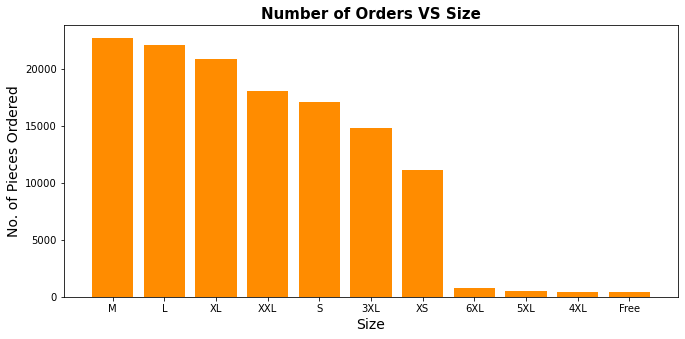

In [46]:
# plot to show above scenerio
plt.figure(figsize=(11,5))
plt.bar(list(data["Size"].value_counts().keys()),list(data["Size"].value_counts()),color="darkorange")
plt.xlabel("Size",fontsize=14)
plt.ylabel("No. of Pieces Ordered",fontsize=14)
plt.title("Number of Orders VS Size",fontsize=15,fontweight="bold")
plt.show()

**Conclusion of Question 8:-** 

Based on the EDA, the highest number of orders was for **size M**, with around **22,000** pieces ordered, while the lowest number of orders was for **size FREE**, with around **350** pieces ordered. 

# 

# Question 9:- What is the Order ID, Amount of the order, and Product Category of the user who ordered the most expensive item?

In [47]:
# OrderID
data[data["Amount"]==data["Amount"].max()]["Order ID"]

42039    402-5239558-4281957
Name: Order ID, dtype: object

In [48]:
# Product Category
data.iloc[data["Amount"].argmax()]["Category"]

'Set'

In [103]:
# Amount
data.iloc[data["Amount"].argmax()]["Amount"]

5584.0

# 

# Question 10:- What is the total revenue generated by the Top 5 order categories?

In [108]:
# Grouping the category to find the total of amount of the orders 
top5_cat_total=data.groupby("Category")["Amount"].sum().sort_values(ascending=False).head(5)

In [109]:
top5_cat_total

Category
Set              40757398.23
kurta            22779663.20
Western Dress    11620590.24
Top               5569336.80
Ethnic Dress       822243.25
Name: Amount, dtype: float64

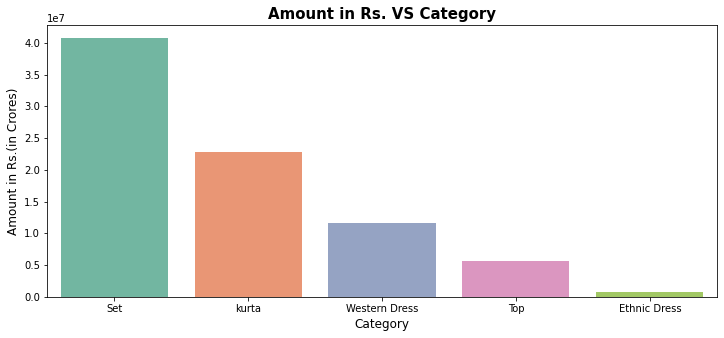

In [111]:
# Barplot of Total of "Amount" of top 10 categories
plt.figure(figsize=(12,5))
sns.barplot(x=top5_cat_total.index,y=top5_cat_total,palette="Set2")
plt.xlabel("Category",fontsize=12)
plt.ylabel("Amount in Rs.(in Crores)",fontsize=12)
plt.title("Amount in Rs. VS Category",fontsize=15,fontweight="bold")
plt.show()

**Conclusion of Question 10:-** 

Based on the EDA, the **highest revenue was generated by Set category i.e., ₹ 4,07,57,398**, followed by Kurtas and Western Dresses, 

while the **lowest revenue was generated by Ethnic Dresses i.e., ₹ 8,22,243**.

# 

# 

In [52]:
# Finding the number of orders with respect to "Courier Status"
data["Courier Status"].value_counts()

Shipped      114284
Unshipped      7558
Cancelled      7133
Name: Courier Status, dtype: int64

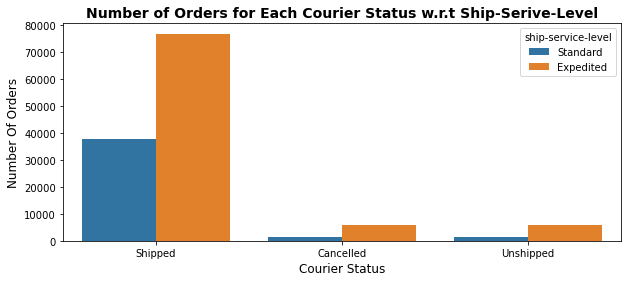

In [53]:
plt.figure(figsize=(10,4))
sns.countplot(x="Courier Status",data=data,hue="ship-service-level")
plt.xlabel("Courier Status",fontsize=12)
plt.ylabel("Number Of Orders",fontsize=12)
plt.title("Number of Orders for Each Courier Status w.r.t Ship-Serive-Level",fontsize=14,fontweight="bold")
plt.show()

# 

# Question 11:- How many orders that were marked as 'Shipped' were delivered through the 'Standard' shipping service, and how many were delivered through the "Expedited" shipping service?

In [54]:
# "Shipped" Orders that were "Standarly" shipped
len(data[(data["Courier Status"]=="Shipped") & (data["ship-service-level"]=="Standard")])

37588

In [55]:
# "Shipped" Orders that were "Expeditedly" shipped
len(data[(data["Courier Status"]=="Shipped") & (data["ship-service-level"]=="Expedited")])

76696

# 

# Question 12:- What is the monthly revenue for each month?

In [58]:
data.groupby("Month")["Amount"].sum()

Month
April    29854180.06
June     24633036.38
March      110042.51
May      27721231.05
Name: Amount, dtype: float64

# 

# Calculating the First and Third Quartiles, Interquartile Range (IQR), Upper Limit, and Lower Limit to Identify Outliers

In [112]:
# Q1 is first quartile , Q3 is third quartile
Q1,Q3=data["Amount"].quantile([0.25,0.75])

In [61]:
Q1

435.0

In [62]:
Q3

771.0

In [113]:
# IQR refers to inter quartile range
IQR=Q3-Q1

In [114]:
IQR

336.0

In [65]:
lower_limit=Q1-1.5*(IQR)

In [66]:
upper_limit=Q3+1.5*(IQR)

In [67]:
lower_limit

-69.0

In [68]:
upper_limit

1275.0

C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


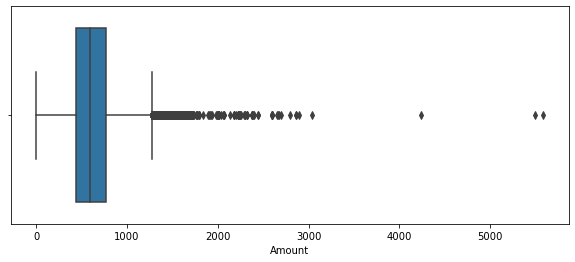

In [115]:
# Using boxplot to find the amounts that can be considered as an outlier
plt.figure(figsize=(10,4))
sns.boxplot(data["Amount"])
plt.show()

# 

**Checking how many orders are outliers on the basis of "Amount" of orders?**

In [70]:
upper_limit

1275.0

In [71]:
len(data[data["Amount"]>upper_limit])

3939

**"There are 3939 orders whose's amount can be considered as an outlier"**

# 

# Conclusion

These are the 11 conclusions we have drawn from our analysis:-

1. Nearly 60% of the total orders were "Shipped", while 14% of the total orders were "Cancelled".

2. The Top 5 States in India in terms of placing orders are Maharashtra, Uttar Pradesh, Karnataka, Telangana and Tamil Nadu with 30%, 14.6%, 23.7%,15.5% and 15.7% of the total orders placed, respectively.
   And the Top 5 Categories from which customers place their orders in the clothing category are Kurta, Western dress, Top, Ethnic dress, and Dupatta .

3. On 2022-05-03 ,maximum orders were placed as per our data i.e., 2085 Orders.

4. The Number of Products ordered in each month during the entire data we have are as follows: April- 49067, May- 42040, June- 37697, March- 171
   and the Percentage of Orders placed in each month are as follows: April (37.98%), May (32.61%), June (29.23%), and March  (0.13%).

5. Almost 68% of the orders were placed using the "Expedited Shipping" service, while the remaining 32% of the orders were placed using the "Standard Shipping" service.

6. The Top 5 States in India in terms of Cancelling Orders are Maharashtra, Karnataka, Telangana, Tamil Nadu, and Uttar Pradesh, with 15.81%, 11.85%, 8.98%, 8.93%, and 8.62% of the total cancelled orders, respectively ¹.

7. It can be concluded that the number of orders cancelled fluctuated between February 2021 and July 2021.
   The highest number of orders cancelled was around 150 in mid-April 2021, while the lowest number of orders cancelled was around 20 in early February 2021.

8. Overall, there is a downward trend in the number of orders cancelled from April 2021 to July 2021.

9. The highest number of orders was for size M, with around 22,000 pieces ordered, while the lowest number of orders was for size FREE, with around 350 pieces ordered.

10. 402-5239558-4281957 is the OrderID of the customer who ordered the most expensive item worth Rs.5584.

11. The highest revenue was generated by Set category i.e., ₹ 4,07,57,398, followed by Kurtas and Western Dresses,while the lowest revenue was generated by Ethnic Dresses i.e., ₹ 8,22,243.
